# Introduction

For the following you may like to look at the first at the introductory videos in [ClimateUnboxed](https://www.youtube.com/channel/UC94xkaJn1NkxR4trAfVArbg)  on 

- ERA5 access
- API access 
- ncview




In [1]:
import cdsapi
c = cdsapi.Client()

from netCDF4 import Dataset,num2date
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfea
import cartopy.util as cutil
import matplotlib as mplt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cdo import Cdo
import os 
cdo=Cdo()
scr="/Users/tompkins/Downloads/"

ModuleNotFoundError: No module named 'cartopy'

In [92]:
def plot_map(ifile,title="",varname="",sf=1.0,units='mm day$^{-1}$',cmap="BrBG",levels=[0,0.1,1,2,5,10,20,30,50]):

    projection=ccrs.PlateCarree()
    bbox=[-180,180,-90,90];creg='glob'
    mplt.rc('xtick', labelsize=9) 
    mplt.rc('ytick', labelsize=9)

    # read the netcdf data
    nc = Dataset(ifile,'r')
    lat = nc.variables['latitude'][:]
    lon = nc.variables['longitude'][:]
    data = nc.variables[varname][0,:,:]*sf
    nc.close()

    #
    lon2d, lat2d = np.meshgrid(lon, lat)
    cdata, clon2d, clat2d = cutil.add_cyclic(data,lon2d,lat2d)


    # set up the figure size
    fig=plt.figure(figsize=(11,5))
    ax=fig.add_subplot(1,1,1,projection=projection)
    ax.set_extent(bbox,projection)

    # add map features
    ax.add_feature(cfea.COASTLINE,lw=.5)
    #ax.add_feature(cfea.RIVERS,lw=.5)
    ax.add_feature(cfea.BORDERS, linewidth=0.6, edgecolor='dimgray')

    # add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1.0, color='gray', alpha=0.7, linestyle='--')
    gl.top_labels = False
    gl.left_labels = True
    gl.right_labels = True
    gl.xlabel_style = {'size': 8, 'color': 'black'}
    gl.ylabel_style = {'size': 8, 'color': 'black'}

    # specify levels and colormap
    #levels=[0,0.1,0.2,0.5,1,2,5,10,20,30,50]
    cmap=plt.cm.BrBG
    cmap=plt.cm.rainbow_r
    norm=mplt.colors.BoundaryNorm(levels,cmap.N)

    # make plot
    pc=ax.contour(clon2d,clat2d,cdata,levels=levels,transform=projection)
    pc=ax.contourf(clon2d,clat2d,cdata,levels=levels,transform=projection,cmap=cmap,norm=norm,extend='max')

    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="3%", pad=0.5, axes_class=plt.Axes)
    cbar=fig.colorbar(pc,extend='both', cax=ax_cb)
    fig.add_axes(ax_cb)

    # add colorbar
    fig.colorbar(pc,extend='both',cax=ax_cb)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel(units, rotation=270)
    cbar.ax.set_title('')

    # add title
    ttitle=title
    ax.set_title(ttitle,loc='left',fontsize=12)

In [45]:
ifile=scr+"precip.nc"
varlist=['sea_surface_temperature', 'surface_latent_heat_flux', 'surface_net_solar_radiation',
            'surface_net_thermal_radiation', 'surface_sensible_heat_flux', 'top_net_solar_radiation',
            'top_net_thermal_radiation', 'total_column_water_vapour', 'total_precipitation']

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'netcdf',
        'year': '2020',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'product_type': 'monthly_averaged_reanalysis',
        'variable': varlist,
        'grid':[1.0,1.0],
        'time': '00:00',
    },
    ifile)




2023-11-13 13:08:53,300 INFO Welcome to the CDS
2023-11-13 13:08:53,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-11-13 13:08:53,457 INFO Request is queued
2023-11-13 13:09:26,320 INFO Request is running
2023-11-13 13:09:43,435 INFO Request is completed
2023-11-13 13:09:43,436 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1699877374.0481625-4398-2-a24cf865-2f12-49aa-ad0f-e2ac9947633f.nc to /Users/tompkins/Downloads/precip.nc (13.4M)
2023-11-13 13:09:49,542 INFO Download rate 2.2M/s                                                    


Result(content_length=14080360,content_type=application/x-netcdf,location=https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/adaptor.mars.internal-1699877374.0481625-4398-2-a24cf865-2f12-49aa-ad0f-e2ac9947633f.nc)

In [64]:
ofile=scr+"yearmean.nc"
ofilejja=scr+"JJAmean.nc"
ofiledjf=scr+"DJFmean.nc"

cdo.timmean(input="-aexpr,pr=1000*tp "+ifile,output=scr+"yearmean.nc",options="-b f32")
cdo.timmean(input="-selmon,12,1,2 -aexpr,pr=1000*tp "+ifile,output=scr+"DJFmean.nc",options="-b f32")
cdo.timmean(input="-selmon,6,7,8 -aexpr,pr=1000*tp "+ifile,output=scr+"JJAmean.nc",options="-b f32")



'/Users/tompkins/Downloads/JJAmean.nc'

In [66]:
# let's have a look to see what there is in the file:
os.system("ncdump -h "+ofile)


netcdf yearmean {
dimensions:
	time = UNLIMITED ; // (1 currently)
	bnds = 2 ;
	longitude = 360 ;
	latitude = 181 ;
variables:
	int time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:bounds = "time_bnds" ;
		time:units = "hours since 1900-01-01 00:00:00.0" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float longitude(longitude) ;
		longitude:standard_name = "longitude" ;
		longitude:long_name = "longitude" ;
		longitude:units = "degrees_east" ;
		longitude:axis = "X" ;
	float latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:units = "degrees_north" ;
		latitude:axis = "Y" ;
	float sst(time, latitude, longitude) ;
		sst:long_name = "Sea surface temperature" ;
		sst:units = "K" ;
		sst:_FillValue = -32767.f ;
		sst:missing_value = -32767.f ;
		sst:cell_methods = "time: mean" ;
	float slhf(time, latitude, longitude) ;
		slhf:standard_name = "surface_upward_latent

0

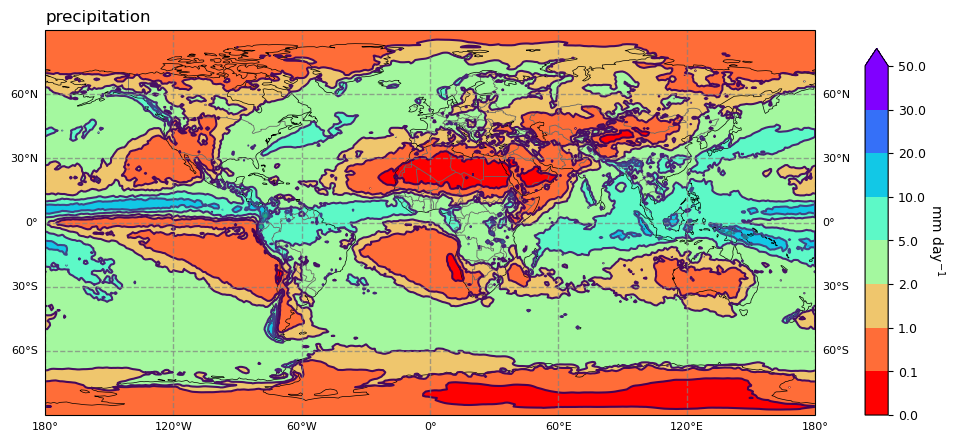

In [98]:
plot_map(scr+"yearmean.nc",title="precipitation",varname="pr",units='mm day$^{-1}$',cmap="Blues")

# you can save any figures in this way:
#plt.savefig("precip_2020.pdf")

plt.show()

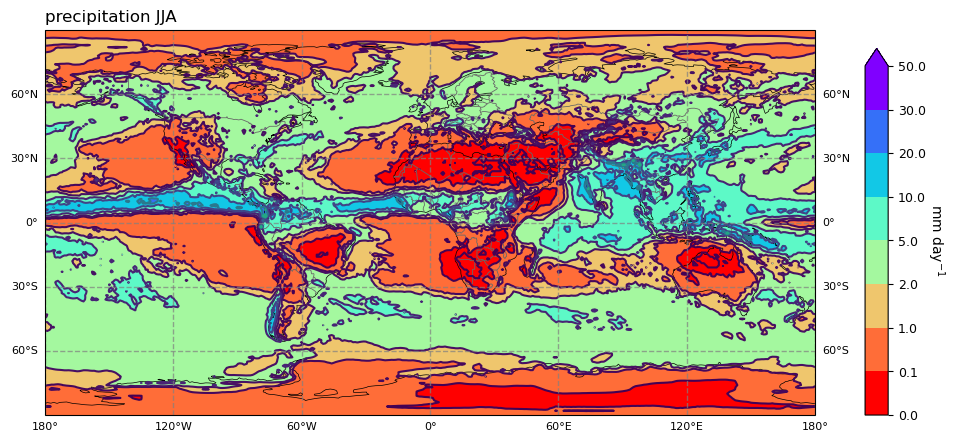

In [97]:
plot_map(ofilejja,title="precipitation JJA",varname="pr",units='mm day$^{-1}$')
plt.show()

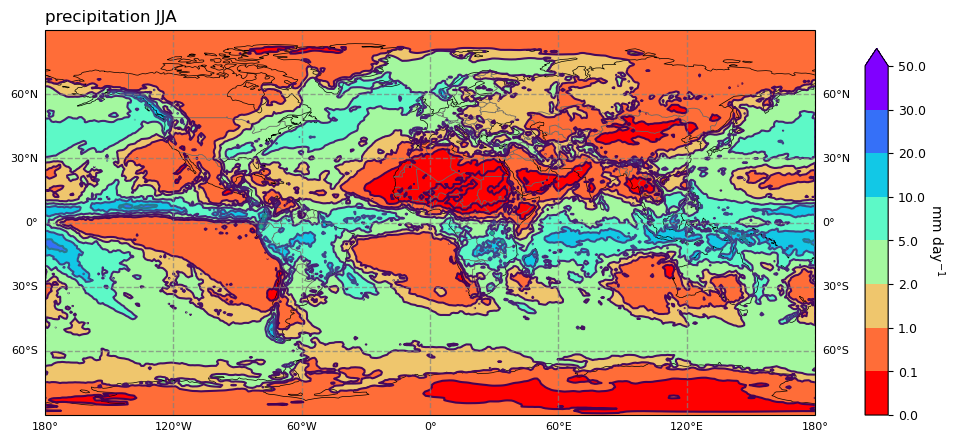

In [94]:
plot_map(ofiledjf,title="precipitation JJA",varname="pr",units='mm day$^{-1}$')
plt.show()

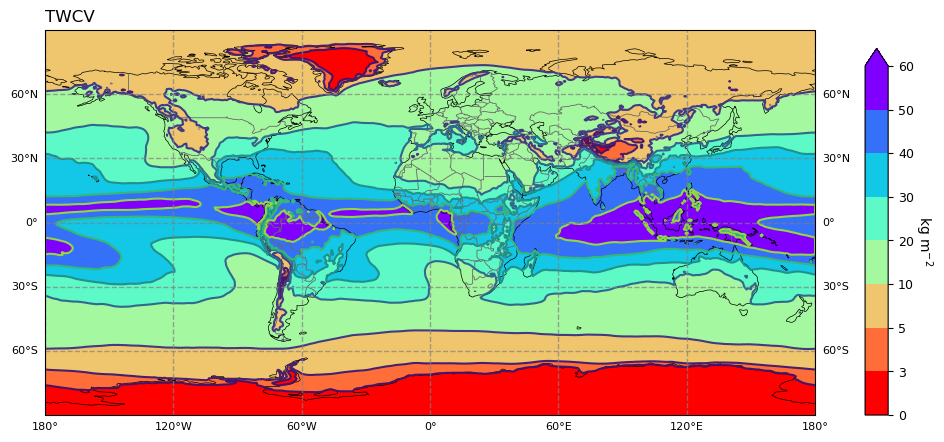

In [95]:
# TCWV
plot_map(ofile,title="TWCV",varname="tcwv",levels=[0,3,5,10,20,30,40,50,60],units='kg m$^{-2}$')
plt.show()

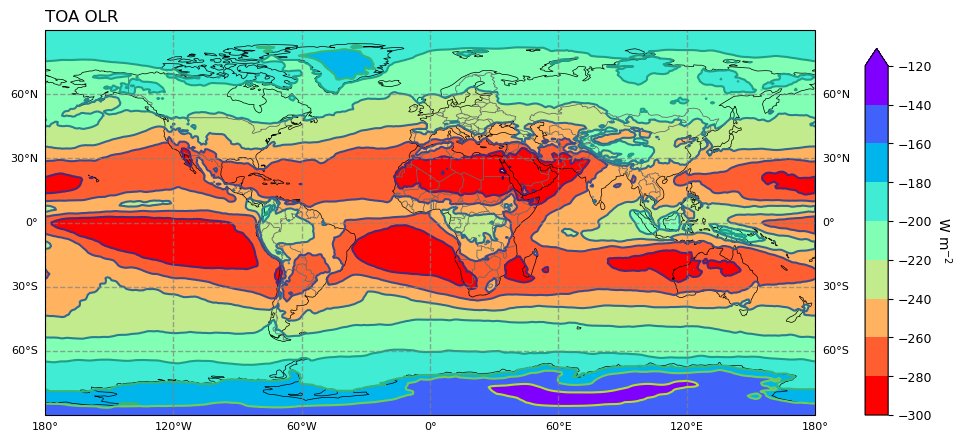

In [93]:
plot_map(ofile,title="TOA OLR",varname="ttr",sf=1./86400.,units='W m$^{-2}$',levels=list(range(-300,-100,20)))
plt.show()

#plot_map(ofile,title="T",varname="tcwv",levels=[0,3,5,10,20,30,40,50,60],units='kg m$^{-2}$')
#plt.show()

Now try to duplicate this and make plots for

- solar radiation
- net radiation
- surface fluxes

for the annual mean, and the seasons. 

You can also open the netcdf files directly from the command line in ncview if you prefer.